In [2]:
# %load ~/ipyhead
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

Using:

* <strike>ERR431617: B cell memory</strike>
* Microarray data: use one same cell type, one other distant cell type. Can we see the difference?

In [4]:
df = pd.read_csv('summary.simple.tsv', sep='\t')
df.head()

,sample_id,gene_name,est_counts,tpm
0,1,A1BG,89.513800,14.958630
1,1,A1CF,14.071500,0.249757
2,1,A2M,0.000000,0.000000
3,1,A2ML1,16.530498,1.209676
4,1,A2MP1,2.000000,0.076626


count    34832.000000
mean        28.709234
std        322.317076
min          0.000000
25%          0.000000
50%          0.351292
75%          6.132022
max      34001.600000
Name: tpm, dtype: float64

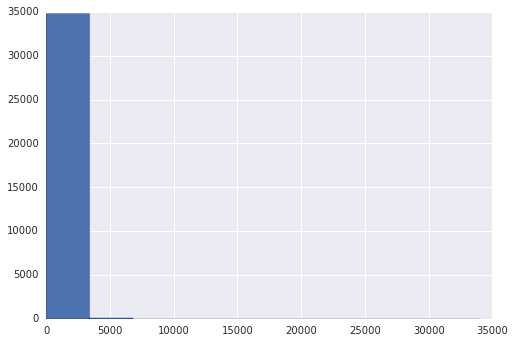

In [6]:
df.tpm.hist()
df.tpm.describe()

In [10]:
# get outliers (http://stackoverflow.com/a/31502974/130164)
df[((df.tpm - df.tpm.mean()) / df.tpm.std()).abs() > 3]

,sample_id,gene_name,est_counts,tpm
652,1,AC010970.2,57739.000000,4941.560000
3263,1,B2M,21168.996440,5608.715540
4933,1,CD37,6330.585960,1026.220960
4961,1,CD74,30023.531000,3931.504500
6902,1,CTD-2328D6.1,57188.000000,34001.600000
7623,1,DDX5,17003.512046,1783.898592
8395,1,EEF1A1,168208.951750,13238.381360
8436,1,EEF1B2,5446.606590,1159.599120
8445,1,EEF1D,5850.008080,1029.788427
8457,1,EEF1G,20726.848300,2088.411560


In [17]:
df=df[df['tpm']!=0]

In [69]:
df['logtpm'] = df.tpm.apply(np.log2)
df['logcnt'] = df.est_counts.apply(np.log2)

count    20803.000000
mean         1.842364
std          3.299392
min        -26.707316
25%         -0.617152
50%          1.804184
75%          4.267305
max         15.053315
Name: logtpm, dtype: float64

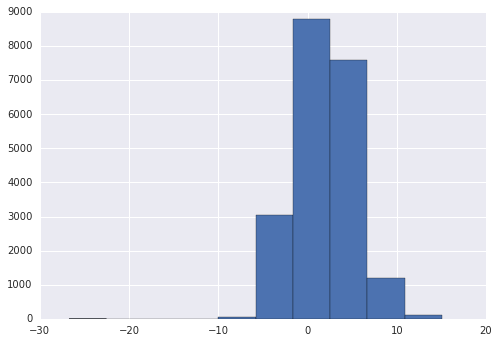

In [22]:
df.logtpm.hist()
df.logtpm.describe()

What we want to do:
Treat microarray and rnaseq data as two samples. How much does it look like they're the same phenotype?

* Compare diffs
* Do hierarchical clustering and see how it looks. Are patterns the same?
* Look for differentially expressed genes, see how many are different (shouldn't be many)
* Sort by most highly expressed transcripts in each sample. Compare ratio between expression of top two.


Apparently running voom transformation on RNAseq data enables treating it like microarray data, i.e. doing linear modeling and GSEA.

In [24]:
# get microarray data
ma = pd.read_csv('../all_expressions.tsv', sep='\t')

In [25]:
del ma['Unnamed: 0']
del ma['ACCNUM']
del ma['Relabel']
del ma['DESC']

In [26]:
ma.head()

,geneid,probeid,PRB12534.Jurkat,PRB12535.Jurkat,PRB12536.Jurkat,PRB12537.IM.9,PRB12538.IM.9,PRB12539.IM.9,PRB12540.Raji,PRB12541.Raji,...,TEM_U133A_1 [TFH_E-MEXP-750|TEM_U133A_1],TEM_U133A_2 [TFH_E-MEXP-750|TEM_U133A_2],TEM_U133A_3 [TFH_E-MEXP-750|TEM_U133A_3],TN_U133A_1 [TFH_E-MEXP-750|TN_U133A_1],TN_U133A_2 [TFH_E-MEXP-750|TN_U133A_2],TN_U133A_3 [TFH_E-MEXP-750|TN_U133A_3],TH_1 [TREGs_GSE4527|GSM101518],Treg_1 [TREGs_GSE4527|GSM101519],TH_2 [TREGs_GSE4527|GSM101520],Treg_2 [TREGs_GSE4527|GSM101521]
0,RFC2,1053_at,2104.464,1913.695,1974.465,2428.428,2232.343,2470.156,831.009,713.614,...,278.508206,315.680926,325.445350,227.014010,298.255643,246.440867,317.871923,182.444126,481.930051,125.805188
1,RFC2,203696_s_at,2858.885,3889.223,2887.030,4171.271,4308.615,3523.738,1085.860,1109.435,...,278.508206,315.680926,325.445350,227.014010,298.255643,246.440867,317.871923,182.444126,481.930051,125.805188
2,HSPA6,117_at,189.528,110.972,160.200,432.932,261.238,280.899,184.187,178.548,...,12.987326,74.128591,141.683528,145.506877,21.656093,77.518896,82.051115,703.693696,194.230338,97.987345
3,HSPA6,213418_at,76.702,85.718,168.155,706.366,463.835,427.057,27.579,119.920,...,12.987326,74.128591,141.683528,145.506877,21.656093,77.518896,82.051115,703.693696,194.230338,97.987345
4,PAX8,121_at,1753.889,1291.766,1885.517,1561.437,1534.517,1540.394,1666.894,1625.360,...,26.766424,117.425553,58.012974,31.797787,102.044136,99.058819,147.641189,135.526908,38.741434,157.813189


In [32]:
for c in ma.columns:
    if 'naive' in c.lower():
        print c

Bcell-naive-1 [HG-U133A] [IRIS_GSE22886|GSM565308]
Bcell-naive-2 [HG-U133A] [IRIS_GSE22886|GSM565309]
Bcell-naive-3 [HG-U133A] [IRIS_GSE22886|GSM565310]
Bcell-naive-4 [HG-U133A] [IRIS_GSE22886|GSM565311]
Bcell-naive-5 [HG-U133A] [IRIS_GSE22886|GSM565312]
Bcell-naive-6 [HG-U133A] [IRIS_GSE22886|GSM565313]
Bcell-naive-7 [HG-U133A] [IRIS_GSE22886|GSM565314]


In [34]:
ma = ma.set_index('geneid')['Bcell-naive-1 [HG-U133A] [IRIS_GSE22886|GSM565308]']

In [35]:
ma.head()

geneid
RFC2     178.716943
RFC2     178.716943
HSPA6     56.191778
HSPA6     56.191778
PAX8     339.781267
Name: Bcell-naive-1 [HG-U133A] [IRIS_GSE22886|GSM565308], dtype: float64

In [70]:
rna = df.set_index('gene_name')[['logtpm', 'logcnt']]
rna.head()

,logtpm,logcnt
gene_name,,
A1BG,3.902906,6.484038
A1CF,-2.001403,3.814704
A2ML1,0.274621,4.047058
A2MP1,-3.706022,1.000000
A3GALT2,-1.286677,1.584963


In [71]:
ma.index, rna.index

(Index([u'A1CF', u'A2M', u'A4GALT', u'A4GNT', u'AAAS', u'AACS', u'AADAC',
        u'AAGAB', u'AAK1', u'AAMP',
        ...
        u'ZSCAN2', u'ZSCAN5A', u'ZW10', u'ZWILCH', u'ZWINT', u'ZXDB', u'ZXDC',
        u'ZYX', u'ZZEF1', u'ZZZ3'],
       dtype='object', name=u'geneid', length=10977),
 Index([u'A1BG', u'A1CF', u'A2ML1', u'A2MP1', u'A3GALT2', u'A4GALT', u'AAAS',
        u'AACS', u'AACSP1', u'AADACL3',
        ...
        u'ZYX', u'ZZEF1', u'ZZZ3', u'bP-21201H5.1', u'bP-21264C1.1',
        u'bP-2171C21.5', u'bP-2189O9.1', u'bP-2189O9.2', u'bP-2189O9.4', u'pk'],
       dtype='object', name=u'gene_name', length=20803))

In [72]:
assert len(rna.index) == len(rna.index.unique())

In [73]:
ma = ma.reset_index().groupby("geneid").agg('mean')

In [74]:

assert len(ma.index) == len(ma.index.unique())

In [75]:
def compare_two_lists(a,b):
    x,y = set(a), set(b)
    print 'uniques:'
    print 'intersect: ', len(x&y)
    print 'in left ONLY : not in right:', len(x-y)
    print 'in right ONLY : not in left:', len(y-x)
print 'compare microarray (left), rna (right) gene names'
compare_two_lists(ma.index, rna.index)

compare microarray (left), rna (right) gene names
uniques:
intersect:  9815
in left ONLY : not in right: 1162
in right ONLY : not in left: 10988


Why are there so many new genes in RNA?

In [81]:
intersect= pd.merge(pd.DataFrame(ma), rna, left_index=True,right_index=True, how='inner')
assert intersect.shape[0] == len(set(ma.index) & set(rna.index))
intersect.columns = ['ma'] + list(intersect.columns[1:])

In [82]:
intersect['ma'] = intersect.ma.apply(np.log2)

In [83]:
intersect.head()

,ma,logtpm,logcnt
A1CF,9.210048,-2.001403,3.814704
A4GALT,6.354458,-0.534494,2.321928
AAAS,5.304803,2.315618,5.087464
AACS,9.272002,4.399062,7.342010
AAGAB,6.413183,5.132148,8.861085


In [84]:
intersect.describe()

,ma,logtpm,logcnt
count,9815.000000,9815.000000,9815.000000
mean,8.317130,2.796491,6.392952
std,1.786400,3.224489,3.211388
min,0.389095,-22.191617,-20.035438
25%,7.246970,0.509596,4.002512
50%,8.658692,3.201146,6.732228
75%,9.516601,5.224166,8.861085
max,15.892516,12.902617,15.370042


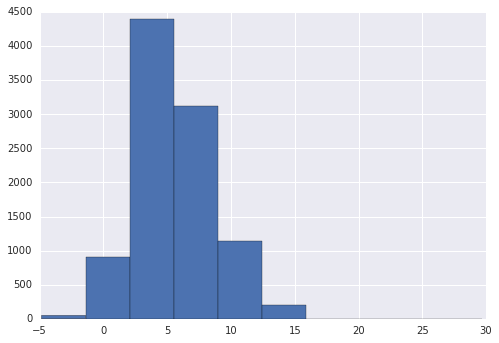

In [86]:
(intersect.ma - intersect.logtpm).hist()

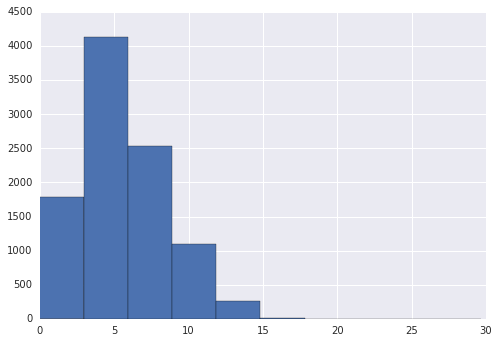

In [87]:
(intersect.ma - intersect.logtpm).abs().hist()

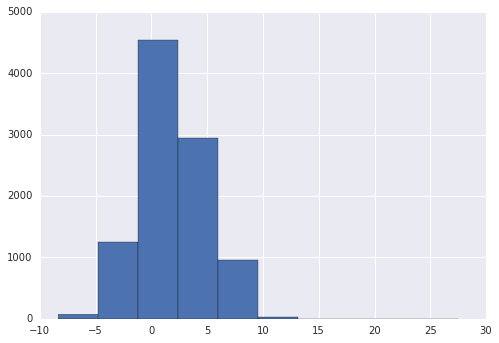

In [88]:
(intersect.ma - intersect.logcnt).hist()

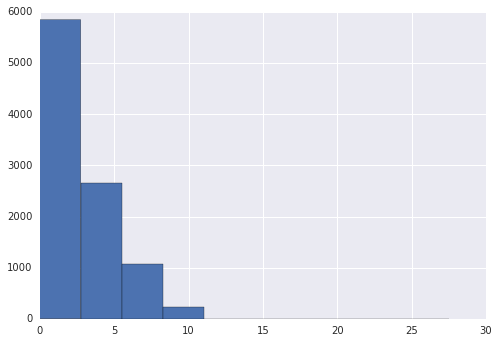

In [89]:
(intersect.ma - intersect.logcnt).abs().hist()